In [63]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import gaussian_kde
from matplotlib.colors import ListedColormap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score, roc_curve
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay

In [15]:
data = pd.read_csv(r"mushroom_cleaned.csv")
data

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1


In [26]:
#checking null values
dfresult=df.dropna()
print(dfresult)
df.isnull().sum()

       cap-diameter  cap-shape  gill-attachment  gill-color  stem-height  \
0              1372          2                2          10     3.807467   
1              1461          2                2          10     3.807467   
2              1371          2                2          10     3.612496   
3              1261          6                2          10     3.787572   
4              1305          6                2          10     3.711971   
...             ...        ...              ...         ...          ...   
54030            73          5                3           2     0.887740   
54031            82          2                3           2     1.186164   
54032            82          5                3           2     0.915593   
54033            79          2                3           2     1.034963   
54034            72          5                3           2     1.158311   

       stem-width  stem-color    season  class  
0            1545          11  1.80427

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

In [27]:
#checking duplicates
print(df.duplicated())
df=df.drop_duplicates()
df.duplicated().sum()

0        False
1        False
2        False
3        False
4        False
         ...  
54030    False
54031    False
54032    False
54033    False
54034    False
Length: 54035, dtype: bool


0

In [28]:
df.dtypes

cap-diameter         int64
cap-shape            int64
gill-attachment      int64
gill-color           int64
stem-height        float64
stem-width           int64
stem-color           int64
season             float64
class                int64
dtype: object

In [39]:
X = data.iloc[:,:-1]
y = data.loc[:,'class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [57]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)



Accuracy: 0.6386601276950125

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.54      0.58      4909
           1       0.65      0.72      0.68      5898

    accuracy                           0.64     10807
   macro avg       0.63      0.63      0.63     10807
weighted avg       0.64      0.64      0.64     10807


Confusion Matrix:
 [[2663 2246]
 [1659 4239]]


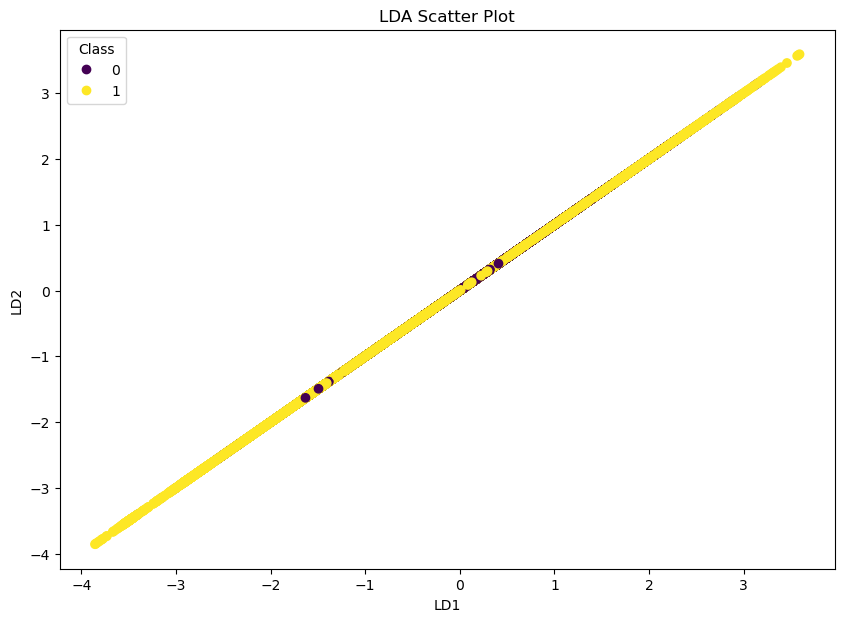

In [78]:
# Perform LDA with n_components set to the minimum of n_features and n_classes - 1
lda = LinearDiscriminantAnalysis(n_components=min(X.shape[1], len(np.unique(y)) - 1))
X_lda = lda.fit_transform(X, y)

# Scatter Plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_lda[:,0], X_lda[:,0], c=y, cmap='viridis')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA Scatter Plot')

# Adding legend (replace with actual class labels)
handles, labels = scatter.legend_elements()
legend_labels = np.unique(y)
plt.legend(handles, legend_labels, title="Class")

accuracy = 0.6387
              precision    recall  f1-score   support

           0       0.62      0.54      0.58      4909
           1       0.65      0.72      0.68      5898

    accuracy                           0.64     10807
   macro avg       0.63      0.63      0.63     10807
weighted avg       0.64      0.64      0.64     10807



<Figure size 800x600 with 0 Axes>

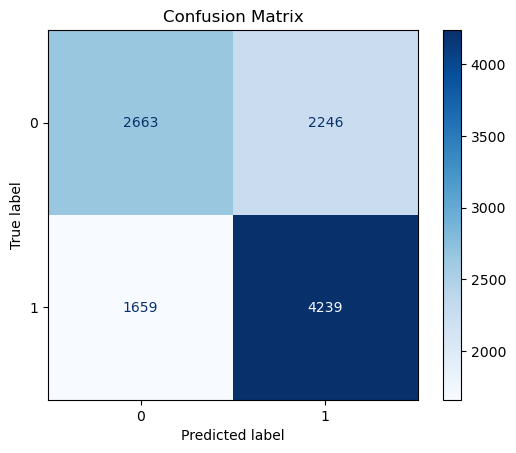

In [64]:
# Confusion Matrix
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
acc = accuracy_score(y_test,y_pred)

print(f"accuracy = {acc:.4f}")
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=legend_labels)
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


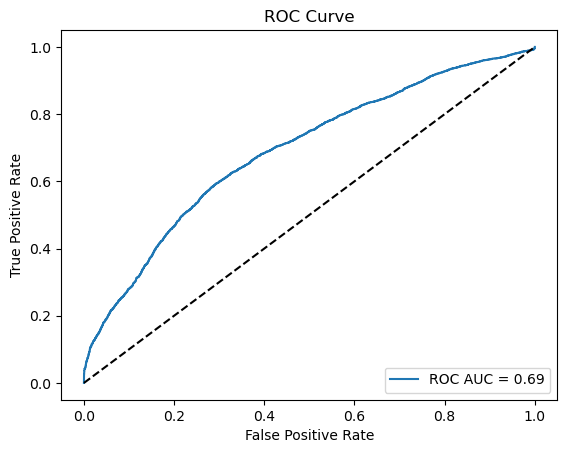

In [42]:
y_prob = lda.predict_proba(X_test)[:, 1] #probability for the positive class
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


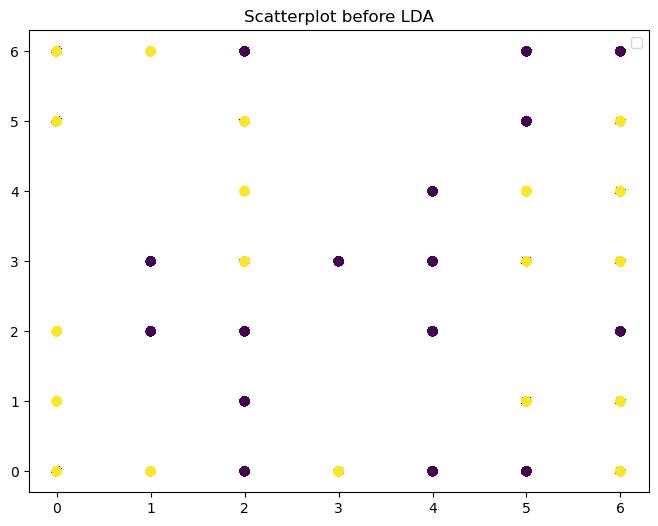

In [65]:
# Scatterplot of the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X[:,1],X[:,2],c=y,cmap="viridis",marker="o")
plt.title('Scatterplot before LDA')

plt.legend()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16536\2584363869.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_lda[y == class_name, 0], label=f'{class_name} (LD1)', shade=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_16536\2584363869.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_lda[y == class_name, 0], label=f'{class_name} (LD1)', shade=True)


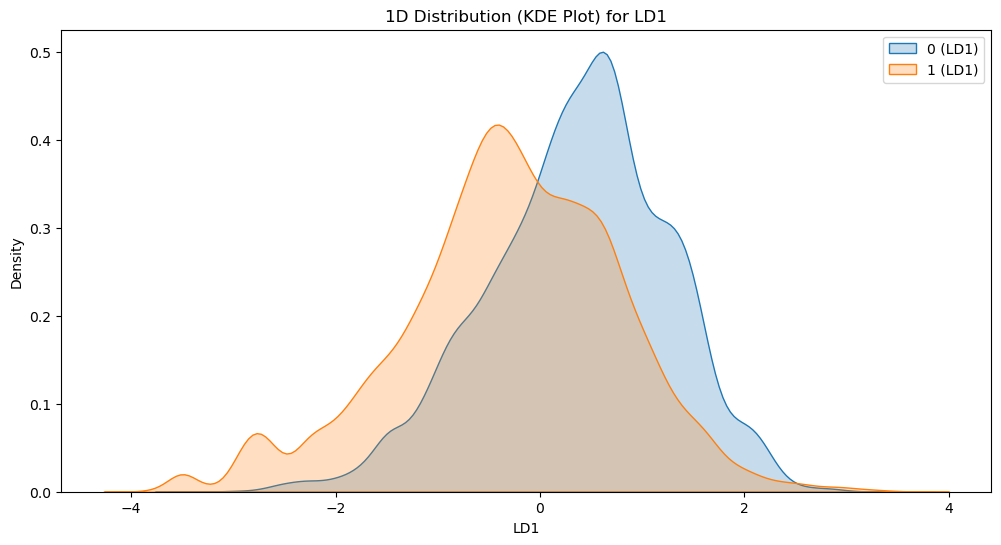

In [74]:
class_names = np.unique(y) #Get unique class names from y

plt.figure(figsize=(12, 6))
for i, class_name in enumerate(class_names):
    #Check if there is at least one sample for the current class
    if np.sum(y == class_name) > 0 :
        #Access the first component (LD1) of the transformed data for each class
        sns.kdeplot(X_lda[y == class_name, 0], label=f'{class_name} (LD1)', shade=True)
plt.title('1D Distribution (KDE Plot) for LD1')
plt.xlabel('LD1')
plt.ylabel('Density')
plt.legend()
plt.show()

#If X_lda has more than one component, you can plot KDE for other components
if X_lda.shape[1] > 1:
  plt.figure(figsize=(12, 6))
  for i, class_name in enumerate(class_names):
      if np.sum(y == class_name) > 0 :
          sns.kdeplot(X_lda[y == class_name, 1], label=f'{class_name} (LD2)', shade=True)
  plt.title('1D Distribution (KDE Plot) for LD2')
  plt.xlabel('LD2')
  plt.ylabel('Density')
  plt.legend()
  plt.show()
